In [1]:
#Imports

import math
import numpy as np
from numpy import genfromtxt
from scipy import stats
from scipy.special import logit as lgTransform
from scipy.interpolate import UnivariateSpline
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pylab as plt 
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit
%matplotlib inline

In [2]:
dfMedianSynon = pd.read_csv('synonMissenseLoFLOEUFCsvs/synonMedians.csv', header=None)
synonObservedTxt = genfromtxt('synonMissenseLoFLOEUFCsvs/synonMedianObserved.csv', delimiter=',')
synonExpectedTxt = genfromtxt('synonMissenseLoFLOEUFCsvs/synonMedianExpected.csv', delimiter=',')

dfMedianSynon = dfMedianSynon.iloc[1: , :]

print(dfMedianSynon)
print(synonObservedTxt)
print(synonExpectedTxt)

synonObserved = synonObservedTxt.tolist()
synonExpected = synonExpectedTxt.tolist()

dfMedianSynon.columns = ['median_covg']
print(dfMedianSynon.head())
print(len(dfMedianSynon))

dfMedianSynon['expected'] = synonExpected
dfMedianSynon['observed'] = synonObserved
print(dfMedianSynon.head())

     0
1   85
2   86
3   87
4   89
5   90
..  ..
72  92
73  41
74  36
75  26
76  25

[76 rows x 1 columns]
[1.67150e+04 1.61170e+04 1.61920e+04 1.53340e+04 1.50640e+04 1.48700e+04
 1.55980e+04 1.73440e+04 1.75800e+04 1.81160e+04 1.86720e+04 1.92100e+04
 1.99650e+04 1.85520e+04 1.87150e+04 1.97830e+04 2.00390e+04 2.03940e+04
 2.08670e+04 2.16980e+04 2.11740e+04 2.09900e+04 1.69800e+04 2.15520e+04
 2.16960e+04 2.23350e+04 2.26710e+04 2.28970e+04 2.29930e+04 2.32310e+04
 2.33260e+04 2.33590e+04 2.31570e+04 2.28110e+04 2.21450e+04 2.14780e+04
 2.06130e+04 1.91540e+04 2.19640e+04 2.28570e+04 2.31480e+04 2.32660e+04
 2.29080e+04 2.31820e+04 8.45800e+03 9.82900e+03 1.13890e+04 6.66000e+03
 5.11300e+03 3.74600e+03 1.25260e+04 1.48680e+04 1.59720e+04 1.67110e+04
 1.74930e+04 1.97910e+04 2.11530e+04 2.25110e+04 2.24920e+04 2.23420e+04
 2.07600e+03 8.35000e+02 1.78680e+04 1.42950e+04 1.41070e+04 1.35050e+04
 1.35050e+04 1.28210e+04 3.91934e+05 1.31030e+04 1.35660e+04 1.47590e+04
 1.87700e+04 1.36

In [3]:
dfMedianSynonNoCovg = pd.read_csv('synonMissenseLoFLOEUFCsvs/synonMediansNoCovg.csv', header=None)
synonObservedTxtNoCovg = genfromtxt('synonMissenseLoFLOEUFCsvs/synonMedianObservedNoCovg.csv', delimiter=',')
synonExpectedTxtNoCovg = genfromtxt('synonMissenseLoFLOEUFCsvs/synonMedianExpectedNoCovg.csv', delimiter=',')

dfMedianSynonNoCovg = dfMedianSynonNoCovg.iloc[1: , :]

print(dfMedianSynonNoCovg)
print(synonObservedTxtNoCovg)
print(synonExpectedTxtNoCovg)

synonObservedNoCovg = synonObservedTxtNoCovg.tolist()
synonExpectedNoCovg = synonExpectedTxtNoCovg.tolist()

dfMedianSynonNoCovg.columns = ['median_covg']
print(dfMedianSynonNoCovg.head())
print(len(dfMedianSynonNoCovg))

dfMedianSynonNoCovg['expected'] = synonExpectedNoCovg
dfMedianSynonNoCovg['observed'] = synonObservedNoCovg
print(dfMedianSynonNoCovg.head())

      0
1    85
2    86
3    87
4    89
5    90
..   ..
97   93
98   94
99   98
100   1
101   0

[101 rows x 1 columns]
[ 17422.  16837.  16875.  15994.  15712.  15455.  16262.  18127.  18408.
  19006.  19626.  20302.  10932.  11369.  12263.  15551.  16453.  17248.
  18111.  19911.  20609.  22530.  21866.  22961.  23293.  24294.  24667.
  25274.  24381.  21023.  18939.  13848.  12861.  21133.  19528.  19814.
  20977.  21268.  21620.  22106.  23209.  22627.  22364.  17730.  23116.
  23279.  24115.  24671.  24998.  25230.  25612.  26003.  26110.  26285.
  26421.  26049.  25651.  26006.  13998.  14055.  13244. 402578.  14013.
  15305.  18718.  26178.  26145.  25830.  25302.  25577.   9714.   9214.
   8228.   7887.   7090.   6650.   6042.   3126.   3246.   2794.   2580.
   2393.   2306.   2277.   2172.   3661.   3822.   4041.   4578.   4853.
   5599.  14768.  25621.  26224.  24379.  23968.  14874.  14599.  13542.
   2040.   1268.]
[ 17493.90869383  16934.09666485  16724.12056086  16112.130

In [4]:
dfMedianSynon['observed/expected'] = dfMedianSynon['observed'] / dfMedianSynon['expected']
print(dfMedianSynon.head())

   median_covg      expected  observed  observed/expected
1           85  16639.623658   16715.0           1.004530
2           86  16106.133410   16117.0           1.000675
3           87  15940.979667   16192.0           1.015747
4           89  15357.201941   15334.0           0.998489
5           90  15133.688087   15064.0           0.995395


In [5]:
dfMedianSynonNoCovg['observed/expected'] = dfMedianSynonNoCovg['observed'] / dfMedianSynonNoCovg['expected']
print(dfMedianSynonNoCovg.head())

   median_covg      expected  observed  observed/expected
1           85  17493.908694   17422.0           0.995890
2           86  16934.096665   16837.0           0.994266
3           87  16724.120561   16875.0           1.009022
4           89  16112.130705   15994.0           0.992668
5           90  15875.505454   15712.0           0.989701


Text(0, 0.5, 'Observed/Expected')

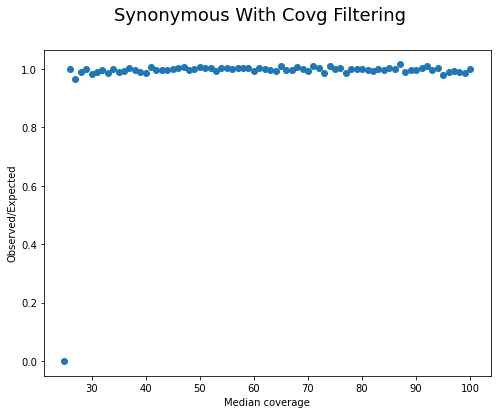

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

plt.scatter(dfMedianSynon['median_covg'], dfMedianSynon['observed/expected'])

fig.suptitle('Synonymous With Covg Filtering', fontsize=18)
plt.xlabel('Median coverage')
plt.ylabel('Observed/Expected')

Text(0, 0.5, 'Observed/Expected')

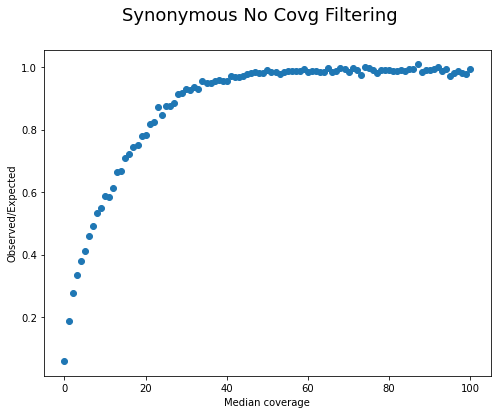

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

plt.scatter(dfMedianSynonNoCovg['median_covg'], dfMedianSynonNoCovg['observed/expected'])

fig.suptitle('Synonymous No Covg Filtering', fontsize=18)
plt.xlabel('Median coverage')
plt.ylabel('Observed/Expected')
#plt.xlim([0,102])
#plt.ylim([0,1])

In [3]:
# plt.scatter(dfGeneSynon['gene_synonymous'], dfGeneSynon['expected'])
# plt.scatter(dfGeneSynon['gene_synonymous'], dfGeneSynon['observed'])
print(dfGeneSynon['expected'].min())
print(dfGeneSynon['expected'].max())
# plt.hist(dfGeneSynon['expected'])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plt.plot(dfGeneSynon['expected'], c = 'b', label = "expected number of mutations")
plt.plot(dfGeneSynon['observed'], c = 'r', label = "observed number of mutations")
plt.ylabel('expected_observed_synon')
plt.xlabel('num_genes')
plt.legend()

0.028203335469634078
6050.469219991923


In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
x_range = np.linspace(0, len(dfGeneSynon), len(dfGeneSynon))
y_range = np.linspace(0, len(dfGeneSynon), len(dfGeneSynon))
#print(len(x_range))
print(len(dfGeneSynon['expected']))
plt.scatter(dfGeneSynon['expected'], dfGeneSynon['observed'], label='observed vs. expected')
plt.plot(x_range, y_range, c = 'orange', label='y = x')
#plt.scatter(x_range, dfGeneSynon['observed'], label = "observed number of mutations")
plt.xscale("log")
plt.yscale("log")
plt.xlabel('expected')
plt.ylabel('observed')
plt.legend()

16049


In [5]:
dfGeneSynon['observed/expected'] = dfGeneSynon['observed'] / dfGeneSynon['expected']
print(dfGeneSynon.head())

           gene_id    expected  observed  observed/expected
0  ENSG00000187634   77.473684     106.0           1.368207
1  ENSG00000188976  219.235725     263.0           1.199622
2  ENSG00000187961  184.565205     255.0           1.381626
3  ENSG00000187583  127.854090     132.0           1.032427
4  ENSG00000188290   10.009585      18.0           1.798276


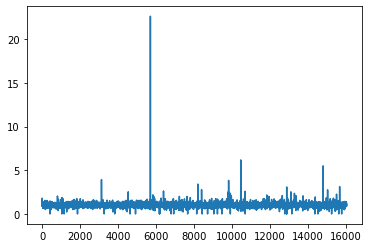

In [6]:
plt.plot(dfGeneSynon['observed/expected'])

In [7]:
# gene    transcript      obs_mis exp_mis oe_mis  mu_mis  possible_mis    obs_mis_pphen   exp_mis_pphen   oe_mis_pphen    possible_mis_pphen      obs_syn exp_syn oe_syn  mu_syn  possible_syn    obs_lof mu_lof  possible_lof    exp_lof pLI     pNull   pRec    oe_lof  oe_syn_lower    oe_syn_upper    oe_mis_lower    oe_mis_upper    oe_lof_lower    oe_lof_upper    constraint_flag syn_z   mis_z   lof_z   oe_lof_upper_rank       oe_lof_upper_bin        oe_lof_upper_bin_6      n_sites classic_caf     max_af  no_lofs obs_het_lof     obs_hom_lof     defined p       exp_hom_lof     classic_caf_afr classic_caf_amr classic_caf_asj classic_caf_eas classic_caf_fin classic_caf_nfe classic_caf_oth classic_caf_sas p_afr   p_amr   p_asj   p_eas   p_fin   p_nfe   p_oth   p_sas   transcript_type gene_id transcript_level        cds_length      num_coding_exons        gene_type       gene_length     exac_pLI        exac_obs_lof    exac_exp_lof    exac_oe_lof     brain_expression        chromosome      start_position  end_position
# SAMD11  ENST00000342066 546     3.6202e+02      1.5082e+00      2.0713e-05      4156    132     9.0043e+01      1.4660e+00      1102    270     1.5898e+02      1.6983e+00      9.2699e-06      1486    22      1.3068e-06      285     2.4538e+01      4.7681e-14      9.4979e-01      5.0208e-02      8.9656e-01      1.5370e+00      1.8750e+00      1.4050e+00      1.6190e+00      6.4000e-01      1.2800e+00      mis_too_many|syn_outlier        -6.9212e+00     -3.4361e+00     4.7484e-01      13738   7       4       34      1.9574e-03      1.1243e-03      125204  446     11      125661  1.8200e-03      4.1626e-01      5.1398e-03      1.4034e-03      6.1387e-04      8.4838e-03      4.9778e-04      1.2324e-03      1.6858e-03      1.0732e-03      4.8134e-03      1.3309e-03      5.9577e-04      7.9700e-03      4.6204e-04      1.1448e-03      1.4678e-03      1.0458e-03      protein_coding  ENSG00000187634 2       2043    13      protein_coding  19696   1.3538e-10      17      2.0005e+01      8.4979e-01      NA      1       860260  879955
# NOC2L   ENST00000327044 577     4.6201e+02      1.2489e+00      2.9346e-05      4856    140     1.3562e+02      1.0323e+00      1490    320     1.9938e+02      1.6049e+00      1.3672e-05      1471    43      2.1537e-06      447     4.1785e+01      2.8933e-29      9.9995e-01      5.2786e-05      1.0291e+00      1.4640e+00      1.7610e+00      1.1660e+00      1.3380e+00      8.0500e-01      1.3270e+00      mis_too_many|syn_outlier        -6.7147e+00     -1.9010e+00     -1.7417e-01     14172   7       4       70      8.1459e-04      1.8303e-04      125546  201     0       125747  7.9954e-04      8.0386e-02      6.8242e-04      4.3436e-04      4.2758e-03      9.3132e-04      4.6194e-05      8.3002e-04      1.3339e-03      5.0007e-04      6.7690e-04      4.3372e-04      4.2750e-03      9.2464e-04      4.6195e-05      8.0019e-04      1.3038e-03      4.9006e-04      protein_coding  ENSG00000188976 2       2247    19      protein_coding  15106   1.3304e-19      29      2.8884e+01      1.0040e+00      NA      1       879584  894689
# KLHL17  ENST00000338591 467     4.3355e+02      1.0772e+00      3.1317e-05      4083    167     1.7558e+02      9.5114e-01      1558    360     2.0109e+02      1.7903e+00      1.6269e-05      1359    26      1.6488e-06      292     2.8650e+01      1.3052e-16      9.7837e-01      2.1625e-02      9.0749e-01      1.6410e+00      1.9390e+00      9.9800e-01      1.1630e+00      6.6400e-01      1.2590e+00      syn_outlier     -8.8090e+00     -5.7094e-01     4.5884e-01      13521   7       4       33      2.4370e-04      5.2832e-05      125310  60      0       125370  2.3932e-04      7.1805e-03      0.0000e+00      2.3435e-04      0.0000e+00      2.1891e-04      0.0000e+00      3.7926e-04      1.6426e-04      1.6406e-04      0.0000e+00      2.3135e-04      0.0000e+00      2.1758e-04      0.0000e+00      3.7124e-04      1.6341e-04      1.6334e-04      protein_coding  ENSG00000187961 2       1926    12      protein_coding  5129    2.5168e-07      13      1.8832e+01      6.9030e-01      NA      1       895967  901095
# PLEKHN1 ENST00000379410 480     3.8117e+02      1.2593e+00      2.4060e-05      3802    135     9.7727e+01      1.3814e+00      1147    216     1.7452e+02      1.2377e+00      1.1429e-05      1323    25      1.5693e-06      332     3.1069e+01      1.1549e-14      8.5111e-01      1.4889e-01      8.0467e-01      1.1070e+00      1.3850e+00      1.1680e+00      1.3580e+00      5.8500e-01      1.1240e+00      mis_too_many    -2.4681e+00     -1.7988e+00     1.0089e+00      12118   6       3       50      8.7804e-04      2.5184e-04      125455  177     1       125633  7.0866e-04      6.3093e-02      2.7152e-03      2.0908e-04      1.0898e-04      2.8479e-04      0.0000e+00      5.8498e-04      7.3836e-04      2.8601e-03      2.5889e-03      2.0239e-04      9.9369e-05      2.7189e-04      0.0000e+00      5.1078e-04      6.5253e-04      1.9944e-03      protein_coding  ENSG00000187583 2       1833    16      protein_coding  9369    2.0197e-08      15      2.1150e+01      7.0923e-01      NA      1       901877  911245
# HES4    ENST00000428771 103     9.0430e+01      1.1390e+00      4.1431e-06      1473    30      3.0382e+01      9.8741e-01      389     53      4.1769e+01      1.2689e+00      1.9868e-06      588     6       1.5251e-07      49      3.5300e+00      1.3746e-05      8.7001e-01      1.2998e-01      1.6997e+00      1.0170e+00      1.5950e+00      9.7000e-01      1.3420e+00      8.1600e-01      1.9470e+00              -1.3661e+00     -4.6973e-01     -1.2182e+00     18996   9       5       8       1.8299e-04      7.2816e-05      124573  44      0       124617  1.7656e-04      3.8846e-03      1.3773e-04      8.8595e-05      0.0000e+00      1.1039e-03      0.0000e+00      1.1713e-04      0.0000e+00      2.3060e-04      1.2583e-04      8.7112e-05      0.0000e+00      1.0457e-03      0.0000e+00      1.1556e-04      0.0000e+00      2.2943e-04      protein_coding  ENSG00000188290 2       741     3       protein_coding  1211    1.4794e-04      5       3.4895e+00      1.4329e+00      NA      1       934342  935552

In [8]:
dfByGene = pd.read_csv('all_lofs/gene_lofs/gnomad.v2.1.1.lof_metrics.by_gene.txt', delimiter = '\t')
print(len(dfByGene))
print(dfByGene.head())

19704
    gene       transcript  obs_mis  exp_mis   oe_mis    mu_mis  possible_mis  \
0  MED13  ENST00000397786      871  1117.80  0.77921  0.000056         14195   
1  NIPBL  ENST00000282516      846  1441.50  0.58688  0.000074         18540   
2   SMC3  ENST00000361804      178   630.07  0.28251  0.000032          8109   
3  CNOT1  ENST00000317147      561  1295.90  0.43290  0.000069         15670   
4    RLF  ENST00000372771      669   972.87  0.68766  0.000047         12682   

   obs_mis_pphen  exp_mis_pphen  oe_mis_pphen  ...       gene_type  \
0          314.0         529.75       0.59273  ...  protein_coding   
1          158.0         543.10       0.29092  ...  protein_coding   
2           21.0         182.52       0.11506  ...  protein_coding   
3           51.0         290.68       0.17545  ...  protein_coding   
4          107.0         321.14       0.33319  ...  protein_coding   

   gene_length  exac_pLI  exac_obs_lof  exac_exp_lof  exac_oe_lof  \
0       122678       1.

In [9]:
print(dfByGene.columns)

Index(['gene', 'transcript', 'obs_mis', 'exp_mis', 'oe_mis', 'mu_mis',
       'possible_mis', 'obs_mis_pphen', 'exp_mis_pphen', 'oe_mis_pphen',
       'possible_mis_pphen', 'obs_syn', 'exp_syn', 'oe_syn', 'mu_syn',
       'possible_syn', 'obs_lof', 'mu_lof', 'possible_lof', 'exp_lof', 'pLI',
       'pNull', 'pRec', 'oe_lof', 'oe_syn_lower', 'oe_syn_upper',
       'oe_mis_lower', 'oe_mis_upper', 'oe_lof_lower', 'oe_lof_upper',
       'constraint_flag', 'syn_z', 'mis_z', 'lof_z', 'oe_lof_upper_rank',
       'oe_lof_upper_bin', 'oe_lof_upper_bin_6', 'n_sites', 'classic_caf',
       'max_af', 'no_lofs', 'obs_het_lof', 'obs_hom_lof', 'defined', 'p',
       'exp_hom_lof', 'classic_caf_afr', 'classic_caf_amr', 'classic_caf_asj',
       'classic_caf_eas', 'classic_caf_fin', 'classic_caf_nfe',
       'classic_caf_oth', 'classic_caf_sas', 'p_afr', 'p_amr', 'p_asj',
       'p_eas', 'p_fin', 'p_nfe', 'p_oth', 'p_sas', 'transcript_type',
       'gene_id', 'transcript_level', 'cds_length', 'num_codi

In [10]:
dfReferenceOEMetrics = dfByGene[['gene','gene_id', 'gene_length', 'obs_syn', 'exp_syn', 'oe_syn', 'mu_syn', 'oe_lof','oe_syn_lower','oe_syn_upper', 'oe_lof_lower','oe_lof_upper']]
print(dfReferenceOEMetrics.head())
print(len(dfReferenceOEMetrics))

    gene          gene_id  gene_length  obs_syn  exp_syn  oe_syn    mu_syn  \
0  MED13  ENSG00000108510       122678      422   387.53  1.0890  0.000019   
1  NIPBL  ENSG00000164190       189655      496   495.01  1.0020  0.000025   
2   SMC3  ENSG00000108055        36946      215   203.25  1.0578  0.000010   
3  CNOT1  ENSG00000125107       109936      470   456.03  1.0306  0.000024   
4    RLF  ENSG00000117000        79549      358   352.62  1.0153  0.000017   

     oe_lof  oe_syn_lower  oe_syn_upper  oe_lof_lower  oe_lof_upper  
0  0.000000         1.005         1.180         0.000         0.030  
1  0.006653         0.930         1.079         0.001         0.032  
2  0.000000         0.946         1.184         0.000         0.037  
3  0.007998         0.955         1.112         0.002         0.038  
4  0.000000         0.930         1.108         0.000         0.040  
19704


In [11]:
snv_genes = dfGeneSynon['gene_id']
print(len(snv_genes))

dfReferenceOEMetricsRefined = dfReferenceOEMetrics.loc[dfReferenceOEMetrics['gene_id'].isin(snv_genes)]

#dfReferenceOEMetricsRefined = dfReferenceOEMetrics[dfReferenceOEMetrics['gene_id'] == snv_genes].values
print(dfReferenceOEMetricsRefined.head())
print(len(dfReferenceOEMetricsRefined))

dfMerged = pd.merge(dfGeneSynon, dfReferenceOEMetricsRefined, on='gene_id', how='inner')
dfMerged['expected/gene_length'] = dfMerged['expected'] / dfMerged['gene_length']
print(dfMerged.head())
print(len(dfMerged))

16049
    gene          gene_id  gene_length  obs_syn  exp_syn  oe_syn    mu_syn  \
0  MED13  ENSG00000108510       122678      422   387.53  1.0890  0.000019   
1  NIPBL  ENSG00000164190       189655      496   495.01  1.0020  0.000025   
2   SMC3  ENSG00000108055        36946      215   203.25  1.0578  0.000010   
3  CNOT1  ENSG00000125107       109936      470   456.03  1.0306  0.000024   
4    RLF  ENSG00000117000        79549      358   352.62  1.0153  0.000017   

     oe_lof  oe_syn_lower  oe_syn_upper  oe_lof_lower  oe_lof_upper  
0  0.000000         1.005         1.180         0.000         0.030  
1  0.006653         0.930         1.079         0.001         0.032  
2  0.000000         0.946         1.184         0.000         0.037  
3  0.007998         0.955         1.112         0.002         0.038  
4  0.000000         0.930         1.108         0.000         0.040  
15809
           gene_id    expected  observed  observed/expected     gene  \
0  ENSG00000187634   77.473

In [12]:
# # Alpha value calculated between 0 and 2 uniformly
# alpha_range = np.linspace(0,2,len(dfMerged))
# print(alpha_range)

# lambdas = dfMerged['expected'] * alpha_range
# print(lambdas)

# probPoissonArray = np.zeros(len(lambdas))
# observed = dfMerged['observed'].values

# for i in range(len(lambdas)):
#     s = stats.poisson.pmf(observed[i], lambdas[i])
#     probPoissonArray[i] = s
    
# print(probPoissonArray)
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
# plt.scatter(alpha_range, probPoissonArray)

In [13]:
# cdfPoissonArray = np.cumsum(probPoissonArray)
# print(cdfPoissonArray)
# print(len(cdfPoissonArray))
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
# plt.scatter(alpha_range, cdfPoissonArray)

In [14]:
# lowerBound = np.percentile(cdfPoissonArray, 5)
# upperBound = np.percentile(cdfPoissonArray, 95)

# print(lowerBound)
# print("LOEUF: ", upperBound)

# fifthPercentile = [lowerBound for i in range(len(alpha_range))]
# ninetyFifthPercentile = [upperBound for i in range(len(alpha_range))]
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
# plt.scatter(alpha_range, cdfPoissonArray)
# plt.plot(alpha_range, fifthPercentile, c = 'r')
# plt.plot(alpha_range, ninetyFifthPercentile, c = 'r')

[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.48184828e-06
 6.45020596e-06 6.41871131e-06]
1.3811013340891423


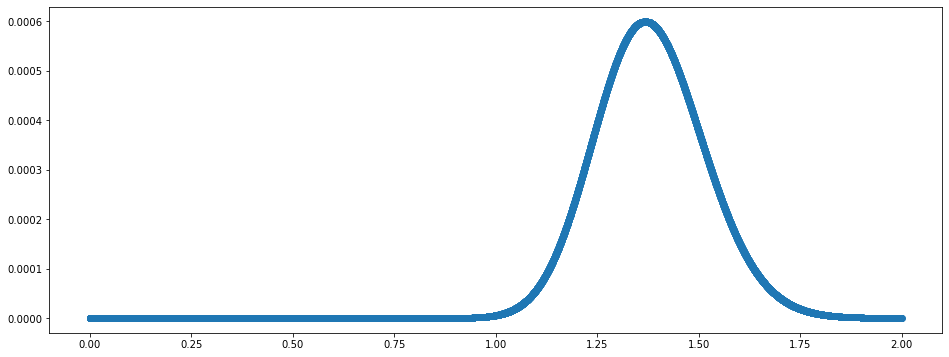

In [15]:
#Only first gene

N_points = 10000
alpha_range = np.linspace(0, 2, N_points)

posterior = stats.poisson.pmf(dfMerged['observed'][0], dfMerged['expected'][0]*alpha_range)
print(posterior)
posterior_prob = posterior/np.sum(posterior)
posterior_mean = np.sum(alpha_range*posterior_prob)
print(posterior_mean)
cdf_gene = np.cumsum(posterior_prob)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plt.scatter(alpha_range, posterior_prob)

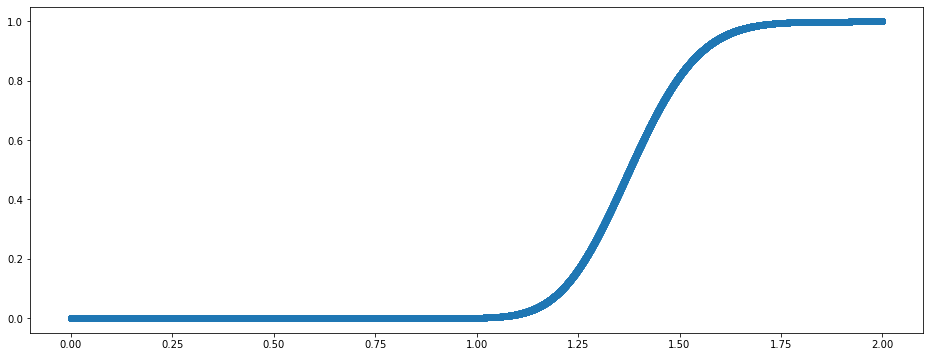

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plt.scatter(alpha_range, cdf_gene)

Lower Bound:  1.169116911691169
Upper Bound:  1.6077607760776078


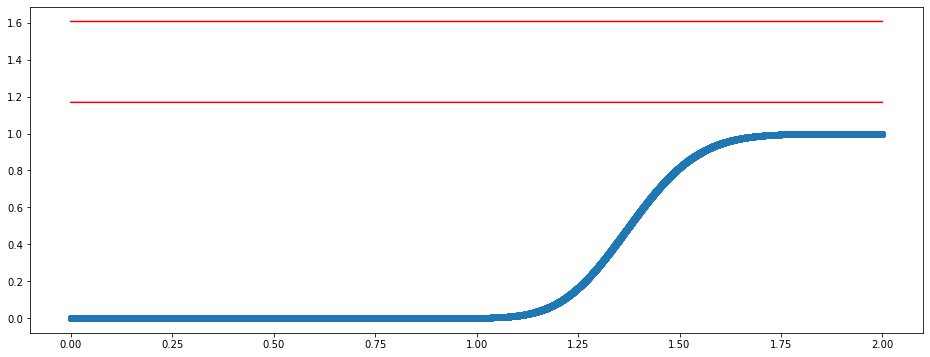

In [17]:
# lowerBound = np.percentile(cdf_gene, 5, interpolation='nearest')
# upperBound = np.percentile(cdf_gene, 95, interpolation='nearest')

lowerBound = alpha_range[np.searchsorted(cdf_gene, 0.05, side="left")]
upperBound = alpha_range[np.searchsorted(cdf_gene, 0.95, side="right")]

print("Lower Bound: ", lowerBound)
print("Upper Bound: ", upperBound)

fifthPercentile = [lowerBound for i in range(len(alpha_range))]
ninetyFifthPercentile = [upperBound for i in range(len(alpha_range))]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plt.scatter(alpha_range, cdf_gene)
plt.plot(alpha_range, fifthPercentile, c = 'r')
plt.plot(alpha_range, ninetyFifthPercentile, c = 'r')

# x_intercept_lower = 0
# for i in range(len(alpha_range)):
#     if (lowerBound > cdf_gene[i]):
#         x_intercept_lower = i
        
# x_intercept_upper = 0
# for i in range(len(alpha_range)):
#     if (upperBound > cdf_gene[i]):
#         x_intercept_upper = i
        
#x_intercept_lower = cdf_gene.tolist().index(lowerBound)
#x_intercept_upper = cdf_gene.tolist().index(upperBound)
        
# print(x_intercept_lower)
# print("Lower Bound: ", alpha_range[x_intercept_lower])

# print(x_intercept_upper)
# print("LOEUF: ", alpha_range[x_intercept_upper])

In [18]:
#Full synon LOEUF

lowerBoundArray = np.zeros(len(dfMerged))
LOEUFArray = np.zeros(len(dfMerged))
posterior_meanArray = np.zeros(len(dfMerged))

for i in range(len(dfMerged)):
    N_points = 10000
    alpha_range = np.linspace(0, 2, N_points)

    posterior = stats.poisson.pmf(dfMerged['observed'][i], dfMerged['expected'][i]*alpha_range)
    #print(posterior)
    posterior_prob = posterior/np.sum(posterior)
    posterior_mean = np.sum(alpha_range*posterior_prob)
    posterior_meanArray[i] = posterior_mean
    #print(posterior_mean)
    cdf_gene = np.cumsum(posterior_prob)
    
    lowerBound = alpha_range[np.searchsorted(cdf_gene, 0.05, side="left")]
    upperBound = alpha_range[np.searchsorted(cdf_gene, 0.95, side="right")]

    fifthPercentile = [lowerBound for i in range(len(alpha_range))]
    ninetyFifthPercentile = [upperBound for i in range(len(alpha_range))]

#     x_intercept_lower = 0
#     for j in range(len(alpha_range)):
#         if (lowerBound > cdf_gene[j]):
#             x_intercept_lower = j

#     x_intercept_upper = 0
#     for j in range(len(alpha_range)):
#         if (upperBound > cdf_gene[j]):
#             x_intercept_upper = j
            
    #x_intercept_lower = cdf_gene.tolist().index(lowerBound)
    #x_intercept_upper = cdf_gene.tolist().index(upperBound)
    
    #print(x_intercept_lower)
    #print("Lower Bound: ", alpha_range[x_intercept_lower])
    lowerBoundArray[i] = lowerBound
    
    #print(x_intercept_upper)
    #print("LOEUF: ", alpha_range[x_intercept_upper])
    LOEUFArray[i] = upperBound
    
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
# plt.scatter(alpha_range, posterior_prob)
print("Lower Bound Array: ", lowerBoundArray)
print("LOEUF Array: ", LOEUFArray)
print("Posterior_Mean Array: ", posterior_meanArray)

Lower Bound Array:  [1.16911691 1.08490849 1.24752475 ... 0.72467247 1.09290929 0.86168617]
LOEUF Array:  [1.60776078 1.32853285 1.53255326 ... 1.04770477 1.38713871 1.43534353]
Posterior_Mean Array:  [1.38110133 1.2041833  1.38704367 ... 0.87994982 1.23635725 1.1332571 ]


In [19]:
print(LOEUFArray.min())
print(LOEUFArray.max())
print(dfMerged['oe_syn_upper'].min())
print(dfMerged['oe_syn_upper'].max())

0.5468546854685469
1.993999399939994
0.643
1.999


In [20]:
dfMerged['lower_oe_bound'] = lowerBoundArray.tolist()
dfMerged['LOEUF'] = LOEUFArray.tolist()
dfMerged['posterior_distribution_mean'] = posterior_meanArray.tolist()
print(dfMerged.head())

           gene_id    expected  observed  observed/expected     gene  \
0  ENSG00000187634   77.473684     106.0           1.368207   SAMD11   
1  ENSG00000188976  219.235725     263.0           1.199622    NOC2L   
2  ENSG00000187961  184.565205     255.0           1.381626   KLHL17   
3  ENSG00000187583  127.854090     132.0           1.032427  PLEKHN1   
4  ENSG00000188290   10.009585      18.0           1.798276     HES4   

   gene_length  obs_syn  exp_syn  oe_syn    mu_syn   oe_lof  oe_syn_lower  \
0        19696      270  158.980  1.6983  0.000009  0.89656         1.537   
1        15106      320  199.380  1.6049  0.000014  1.02910         1.464   
2         5129      360  201.090  1.7903  0.000016  0.90749         1.641   
3         9369      216  174.520  1.2377  0.000011  0.80467         1.107   
4         1211       53   41.769  1.2689  0.000002  1.69970         1.017   

   oe_syn_upper  oe_lof_lower  oe_lof_upper  expected/gene_length  \
0         1.875         0.640      

15809
15809


Text(0, 0.5, 'Calculated LOEUF')

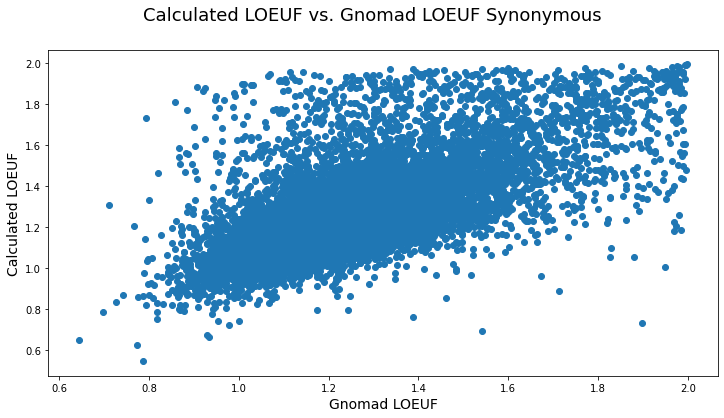

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
print(len(dfMerged['oe_lof_upper']))
print(len(dfMerged['LOEUF']))

plt.scatter(dfMerged['oe_syn_upper'], dfMerged['LOEUF'])
fig.suptitle('Calculated LOEUF vs. Gnomad LOEUF Synonymous', fontsize=18)
plt.xlabel('Gnomad LOEUF', fontsize = 14)
plt.ylabel('Calculated LOEUF', fontsize = 14)

In [22]:
print(dfMerged['observed/expected'].max())
dfMergedNoOutlier = dfMerged[dfMerged['observed/expected'] <= 2.0]
plt.scatter(dfMergedNoOutlier['LOEUF'], dfMergedNoOutlier['observed/expected'])
plt.xlabel('LOEUF')
plt.ylabel('Observed/Expected')

22.633871689566927


Text(0, 0.5, 'Observed/Expected')

Text(0, 0.5, 'Frequency')

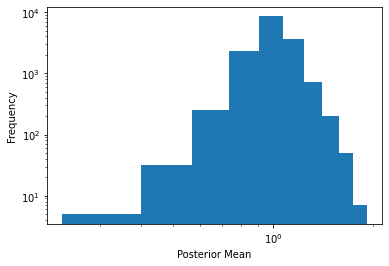

In [23]:
plt.hist(dfMerged['posterior_distribution_mean'])
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Posterior Mean')
plt.ylabel('Frequency')

5661.0


Text(0, 0.5, 'LOEUF')

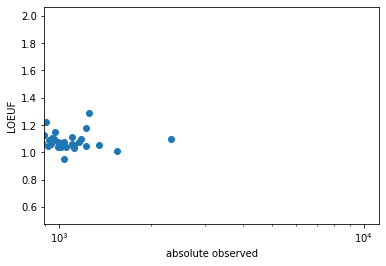

In [24]:
print(dfMerged['observed'].max())
dfMergedNoOutlier1 = dfMerged[dfMerged['observed'] <= 5000]
plt.scatter(dfMergedNoOutlier1['observed'], dfMergedNoOutlier1['LOEUF'])
plt.xscale("log")
#plt.yscale("log")
plt.xlabel('absolute observed')
plt.ylabel('LOEUF')

In [25]:
dfMerged['calculated_oe_std_dev'] = ((dfMerged['observed'] - dfMerged['expected']) / np.sqrt(dfMerged['expected']))
dfMerged['gnomad_oe_std_dev'] = ((dfMerged['obs_syn'] - dfMerged['exp_syn']) / np.sqrt(dfMerged['exp_syn']))
print(dfMerged.head())

           gene_id    expected  observed  observed/expected     gene  \
0  ENSG00000187634   77.473684     106.0           1.368207   SAMD11   
1  ENSG00000188976  219.235725     263.0           1.199622    NOC2L   
2  ENSG00000187961  184.565205     255.0           1.381626   KLHL17   
3  ENSG00000187583  127.854090     132.0           1.032427  PLEKHN1   
4  ENSG00000188290   10.009585      18.0           1.798276     HES4   

   gene_length  obs_syn  exp_syn  oe_syn    mu_syn  ...  oe_syn_lower  \
0        19696      270  158.980  1.6983  0.000009  ...         1.537   
1        15106      320  199.380  1.6049  0.000014  ...         1.464   
2         5129      360  201.090  1.7903  0.000016  ...         1.641   
3         9369      216  174.520  1.2377  0.000011  ...         1.107   
4         1211       53   41.769  1.2689  0.000002  ...         1.017   

   oe_syn_upper  oe_lof_lower  oe_lof_upper  expected/gene_length  \
0         1.875         0.640         1.280              0.

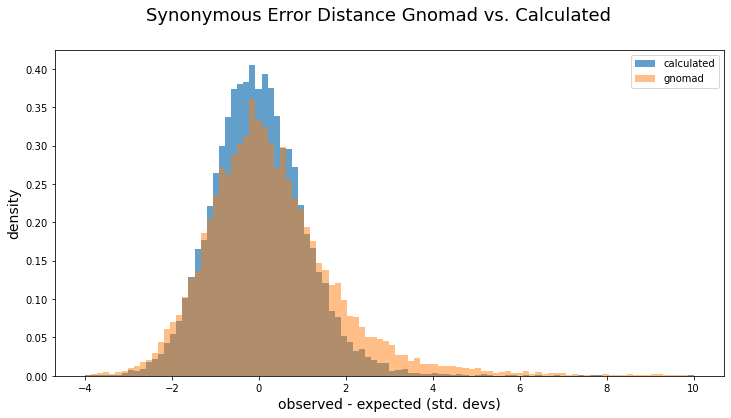

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

plt.hist((dfMerged.observed - dfMerged.expected)/np.sqrt(dfMerged.expected), label='calculated', range=[-4, 10], bins = 100, alpha=0.7, density=True)
plt.hist((dfMerged.obs_syn - dfMerged.exp_syn)/np.sqrt(dfMerged.exp_syn), label='gnomad', range=[-4, 10], bins = 100, alpha=0.5, density=True)
fig.suptitle('Synonymous Error Distance Gnomad vs. Calculated', fontsize=18)
plt.xlabel("observed - expected (std. devs)", fontsize = 14)
plt.ylabel("density", fontsize = 14)
plt.legend()

In [27]:
dfSynonymous = dfMerged.drop(['calculated_oe_std_dev', 'gnomad_oe_std_dev'], axis=1)
print(dfSynonymous.columns)
dfSynonymous.columns = [['gene_id', 'expected_SYN', 'observed_SYN', 'observed/expected_SYN', 'gene_SYN',
       'gene_length', 'obs_syn', 'exp_syn', 'oe_syn', 'mu_syn', 'oe_lof',
       'oe_syn_lower', 'oe_syn_upper', 'oe_lof_lower', 'oe_lof_upper',
       'expected/gene_length', 'lower_oe_bound', 'LOEUF_SYN',
       'posterior_distribution_mean_SYN']]
print(dfSynonymous.head())

Index(['gene_id', 'expected', 'observed', 'observed/expected', 'gene',
       'gene_length', 'obs_syn', 'exp_syn', 'oe_syn', 'mu_syn', 'oe_lof',
       'oe_syn_lower', 'oe_syn_upper', 'oe_lof_lower', 'oe_lof_upper',
       'expected/gene_length', 'lower_oe_bound', 'LOEUF',
       'posterior_distribution_mean'],
      dtype='object')
           gene_id expected_SYN observed_SYN observed/expected_SYN gene_SYN  \
0  ENSG00000187634    77.473684        106.0              1.368207   SAMD11   
1  ENSG00000188976   219.235725        263.0              1.199622    NOC2L   
2  ENSG00000187961   184.565205        255.0              1.381626   KLHL17   
3  ENSG00000187583   127.854090        132.0              1.032427  PLEKHN1   
4  ENSG00000188290    10.009585         18.0              1.798276     HES4   

  gene_length obs_syn  exp_syn  oe_syn    mu_syn   oe_lof oe_syn_lower  \
0       19696     270  158.980  1.6983  0.000009  0.89656        1.537   
1       15106     320  199.380  1.6049  0.

In [28]:
#dfSynonymous.to_csv('synonMetrics.csv', index=False)

1620146
15809
                                 OLS Regression Results                                
Dep. Variable:               expected   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          2.530e+06
Date:                Tue, 03 Aug 2021   Prob (F-statistic):                        0.00
Time:                        16:42:48   Log-Likelihood:                         -62015.
No. Observations:               15809   AIC:                                  1.240e+05
Df Residuals:                   15808   BIC:                                  1.240e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

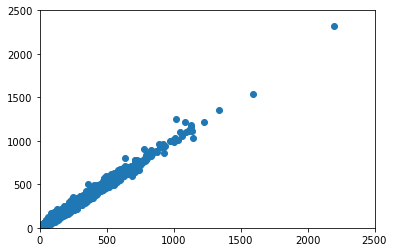

In [38]:
dfSynonymousWithMedian = pd.read_csv('dfFilterQuality80Synonymous.csv')
#print(dfSynonymousWithMedian.head())
print(len(dfSynonymousWithMedian))
#print(dfMerged.head())
print(len(dfMerged))
plt.scatter(dfMerged['expected'],dfMerged['observed'])
plt.xlim([0,2500])
plt.ylim([0,2500])

oVeLinear = sm.OLS(dfMerged['expected'], dfMerged['observed'])
oVeSummary = oVeLinear.fit()
print(oVeSummary.summary())